<a href="https://colab.research.google.com/github/KasunAt/CapstoneProject/blob/main/Capstone_Project_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CAPSTONE PROJECT - MACHINE LEARNING FOUNDATION - JAN 2022**

# **Dataset: Car Insurance Data**
Reference: Car insurance dataset - Owner: Sagnik Roy - https://www.kaggle.com/datasets/sagnik1511/car-insurance-data?resource=download

1. import python modules

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics

2. Load dataset

In [91]:
file_path= 'https://raw.githubusercontent.com/KasunAt/CapstoneProject/main/Car_Insurance_Claim.csv'

# Load CSV File
data = pd.read_csv(file_path)

3. Data Pre-processing

In [92]:
# Visualize the data set
data.sample(5)

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
9472,47324,26-39,female,majority,10-19y,university,middle class,0.495177,1.0,after 2015,1.0,1.0,10238,10000.0,sedan,1,0,0,0.0
4101,827830,26-39,male,majority,10-19y,university,middle class,0.523785,1.0,before 2015,1.0,0.0,10238,15000.0,sedan,0,0,0,0.0
4251,869694,16-25,male,majority,0-9y,high school,working class,0.512145,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
8745,450037,16-25,female,majority,0-9y,university,middle class,0.493551,0.0,before 2015,0.0,1.0,10238,10000.0,sedan,0,0,0,0.0
5824,639413,26-39,male,majority,0-9y,none,poverty,0.407326,1.0,before 2015,0.0,0.0,10238,17000.0,sedan,0,0,0,1.0


In [94]:
# Check the size of the data set
rows =  data.shape[0]
columns =  data.shape[1]
print(F"rows = {rows}, columns={columns}")

rows = 10000, columns=19


In [95]:
# Check and understand data types
data.dtypes

ID                       int64
AGE                     object
GENDER                  object
RACE                    object
DRIVING_EXPERIENCE      object
EDUCATION               object
INCOME                  object
CREDIT_SCORE           float64
VEHICLE_OWNERSHIP      float64
VEHICLE_YEAR            object
MARRIED                float64
CHILDREN               float64
POSTAL_CODE              int64
ANNUAL_MILEAGE         float64
VEHICLE_TYPE            object
SPEEDING_VIOLATIONS      int64
DUIS                     int64
PAST_ACCIDENTS           int64
OUTCOME                float64
dtype: object

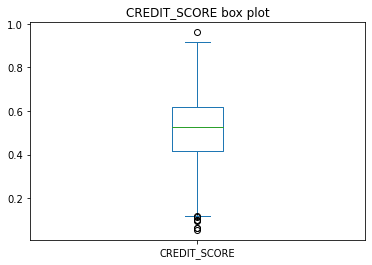

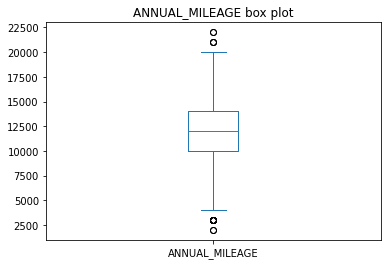

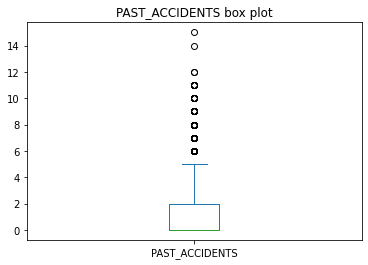

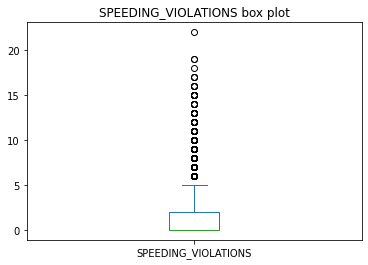

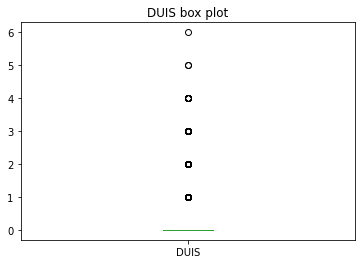

In [96]:
# Check for outliers in numerical columns [CREDIT_SCORE, ANNUAL_MILEAGE, PAST_ACCIDENTS, SPEEDING_VIOLATIONS, DUIS]

data['CREDIT_SCORE'].plot(kind='box', title='CREDIT_SCORE box plot')
plt.show()
data['ANNUAL_MILEAGE'].plot(kind='box', title='ANNUAL_MILEAGE box plot')
plt.show()
data['PAST_ACCIDENTS'].plot(kind='box', title='PAST_ACCIDENTS box plot')
plt.show()
data['SPEEDING_VIOLATIONS'].plot(kind='box', title='SPEEDING_VIOLATIONS box plot')
plt.show()
data['DUIS'].plot(kind='box', title='DUIS box plot')
plt.show()

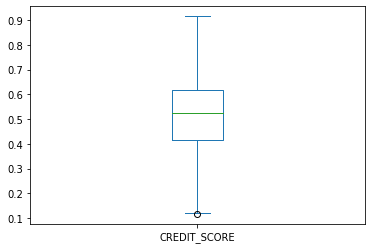

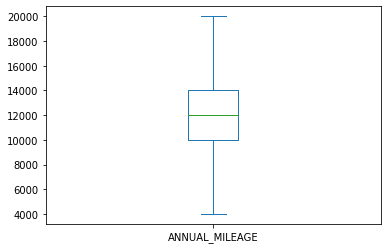

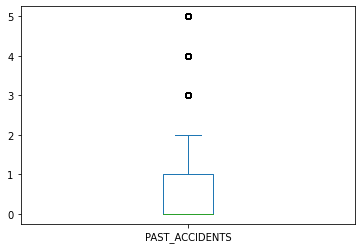

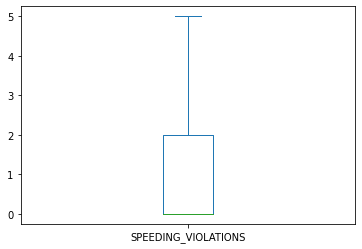

In [97]:
# Remove outliers
q1 = data['CREDIT_SCORE'].quantile(q=0.25)
q3 = data['CREDIT_SCORE'].quantile(q=0.75)
lower_bound = q1 - 1.5*(q3-q1)
upper_bound = q3 + 1.5*(q3-q1)
data.drop(data[data['CREDIT_SCORE'] < lower_bound].index, inplace = True)
data.drop(data[data['CREDIT_SCORE'] > upper_bound].index, inplace = True)
data['CREDIT_SCORE'].plot(kind='box')
plt.show()

q1 = data['ANNUAL_MILEAGE'].quantile(q=0.25)
q3 = data['ANNUAL_MILEAGE'].quantile(q=0.75)
lower_bound = q1 - 1.5*(q3-q1)
upper_bound = q3 + 1.5*(q3-q1)
data.drop(data[data['ANNUAL_MILEAGE'] < lower_bound].index, inplace = True)
data.drop(data[data['ANNUAL_MILEAGE'] > upper_bound].index, inplace = True)
data['ANNUAL_MILEAGE'].plot(kind='box')
plt.show()

q1 = data['PAST_ACCIDENTS'].quantile(q=0.25)
q3 = data['PAST_ACCIDENTS'].quantile(q=0.75)
lower_bound = q1 - 1.5*(q3-q1)
upper_bound = q3 + 1.5*(q3-q1)
data.drop(data[data['PAST_ACCIDENTS'] < lower_bound].index, inplace = True)
data.drop(data[data['PAST_ACCIDENTS'] > upper_bound].index, inplace = True)
data['PAST_ACCIDENTS'].plot(kind='box')
plt.show()

q1 = data['SPEEDING_VIOLATIONS'].quantile(q=0.25)
q3 = data['SPEEDING_VIOLATIONS'].quantile(q=0.75)
lower_bound = q1 - 1.5*(q3-q1)
upper_bound = q3 + 1.5*(q3-q1)
data.drop(data[data['SPEEDING_VIOLATIONS'] < lower_bound].index, inplace = True)
data.drop(data[data['SPEEDING_VIOLATIONS'] > upper_bound].index, inplace = True)
data['SPEEDING_VIOLATIONS'].plot(kind='box')
plt.show()


In [98]:
# Analyse for abnormality
data.groupby(by='PAST_ACCIDENTS')['OUTCOME'].value_counts()

PAST_ACCIDENTS  OUTCOME
0               0.0        2888
                1.0        2604
1               0.0        1404
                1.0         255
2               0.0         854
                1.0         128
3               0.0         488
                1.0          49
4               0.0         286
                1.0          24
5               0.0         183
                1.0           8
Name: OUTCOME, dtype: int64

In [99]:
# Check remaining row count

data.shape

(9171, 19)

In [100]:
# Check for missing values
data.isnull().any()


ID                     False
AGE                    False
GENDER                 False
RACE                   False
DRIVING_EXPERIENCE     False
EDUCATION              False
INCOME                 False
CREDIT_SCORE            True
VEHICLE_OWNERSHIP      False
VEHICLE_YEAR           False
MARRIED                False
CHILDREN               False
POSTAL_CODE            False
ANNUAL_MILEAGE          True
VEHICLE_TYPE           False
SPEEDING_VIOLATIONS    False
DUIS                   False
PAST_ACCIDENTS         False
OUTCOME                False
dtype: bool

In [101]:
# Remove rows with missing values
data.dropna(how='any', axis=0, inplace=True)
data.isnull().any()

ID                     False
AGE                    False
GENDER                 False
RACE                   False
DRIVING_EXPERIENCE     False
EDUCATION              False
INCOME                 False
CREDIT_SCORE           False
VEHICLE_OWNERSHIP      False
VEHICLE_YEAR           False
MARRIED                False
CHILDREN               False
POSTAL_CODE            False
ANNUAL_MILEAGE         False
VEHICLE_TYPE           False
SPEEDING_VIOLATIONS    False
DUIS                   False
PAST_ACCIDENTS         False
OUTCOME                False
dtype: bool

In [102]:
# verify remaining row count

data.shape


(7464, 19)

In [103]:
# Check for bias in the data set
data['OUTCOME'].value_counts()

0.0    4982
1.0    2482
Name: OUTCOME, dtype: int64

Data Encoding and Normalizing

In [104]:
data.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [105]:
# Verify relevance of feature
data.groupby(by='AGE')['OUTCOME'].value_counts()

AGE    OUTCOME
16-25  1.0        1151
       0.0         461
26-39  0.0        1612
       1.0         820
40-64  0.0        1808
       1.0         357
65+    0.0        1101
       1.0         154
Name: OUTCOME, dtype: int64

In [106]:
#Encode
AG = {'16-25' : 1, '26-39' : 2, '40-64' : 3, '65+' : 4}
data['AGE_NU'] = data['AGE'].replace(AG)
data.sample(5)

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,AGE_NU
9139,971183,16-25,male,minority,0-9y,none,working class,0.403113,0.0,before 2015,1.0,1.0,32765,7000.0,sedan,0,0,0,1.0,1
1892,378356,26-39,male,majority,10-19y,none,poverty,0.142857,1.0,before 2015,1.0,1.0,32765,8000.0,sedan,3,1,0,1.0,2
6292,587909,40-64,female,majority,20-29y,university,upper class,0.822455,0.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0,3
626,882026,40-64,female,majority,20-29y,high school,working class,0.323671,0.0,before 2015,0.0,1.0,10238,14000.0,sedan,2,1,1,0.0,3
4040,272901,65+,male,majority,0-9y,high school,upper class,0.577763,1.0,after 2015,1.0,1.0,10238,11000.0,sedan,0,0,0,0.0,4


In [107]:
# Verify relevance of feature
data.groupby(by='RACE')['OUTCOME'].value_counts()


RACE      OUTCOME
majority  0.0        4485
          1.0        2215
minority  0.0         497
          1.0         267
Name: OUTCOME, dtype: int64

In [17]:
#Race does not seem to impact outcome since the probability is same for majority and minority

In [108]:
data.groupby(by='GENDER')['OUTCOME'].value_counts()

GENDER  OUTCOME
female  0.0        2871
        1.0        1077
male    0.0        2111
        1.0        1405
Name: OUTCOME, dtype: int64

In [109]:
#encode
GE = {'male' : 1, 'female' : 2}
data['GENDER_NU'] = data['GENDER'].replace(GE)
data.sample(5)

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,...,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,AGE_NU,GENDER_NU
5989,481495,16-25,male,majority,0-9y,high school,poverty,0.411158,0.0,before 2015,...,0.0,10238,15000.0,sedan,0,0,0,1.0,1,1
2656,762763,65+,female,majority,0-9y,high school,upper class,0.819135,1.0,before 2015,...,1.0,92101,11000.0,sedan,0,0,0,0.0,4,2
4616,854068,65+,female,majority,30y+,university,upper class,0.820020,1.0,after 2015,...,1.0,10238,15000.0,sedan,1,1,1,0.0,4,2
3586,262959,40-64,female,majority,0-9y,none,poverty,0.462694,1.0,before 2015,...,1.0,10238,14000.0,sedan,0,0,0,0.0,3,2
2865,403182,26-39,male,majority,10-19y,high school,middle class,0.490530,1.0,before 2015,...,0.0,10238,12000.0,sedan,3,0,2,0.0,2,1


In [110]:
# Verify relevance of feature
data.groupby(by='DRIVING_EXPERIENCE')['OUTCOME'].value_counts()

DRIVING_EXPERIENCE  OUTCOME
0-9y                1.0        1786
                    0.0        1065
10-19y              0.0        1998
                    1.0         610
20-29y              0.0        1397
                    1.0          75
30y+                0.0         522
                    1.0          11
Name: OUTCOME, dtype: int64

In [111]:
#Encode
DE = {'0-9y' : 1, '10-19y' : 2, '20-29y' : 3, '30y+' : 4}
data['DRIVING_EXPERIENCE_NU'] = data['DRIVING_EXPERIENCE'].replace(DE)
data.sample(5)

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,...,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,AGE_NU,GENDER_NU,DRIVING_EXPERIENCE_NU
9791,340860,65+,male,majority,20-29y,university,upper class,0.742958,0.0,after 2015,...,10238,14000.0,sedan,2,2,3,0.0,4,1,3
89,554995,16-25,male,majority,0-9y,university,upper class,0.585342,1.0,before 2015,...,10238,12000.0,sports car,0,0,0,1.0,1,1,1
1734,600608,16-25,male,majority,0-9y,high school,middle class,0.384055,0.0,before 2015,...,21217,17000.0,sedan,0,0,0,1.0,1,1,1
8548,514747,26-39,male,majority,10-19y,high school,middle class,0.659053,1.0,before 2015,...,10238,11000.0,sedan,0,0,1,0.0,2,1,2
4347,67451,26-39,male,majority,0-9y,high school,middle class,0.535099,1.0,before 2015,...,10238,11000.0,sedan,0,0,0,0.0,2,1,1


In [112]:
# Verify relevance of feature
data.groupby(by='EDUCATION')['OUTCOME'].value_counts()

EDUCATION    OUTCOME
high school  0.0        2053
             1.0        1083
none         0.0         763
             1.0         695
university   0.0        2166
             1.0         704
Name: OUTCOME, dtype: int64

In [113]:
#Encode
ED = {'none' : 1, 'high school' : 2, 'university' : 3}
data['EDUCATION_NU'] = data['EDUCATION'].replace(ED)
data.sample(5)

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,...,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,AGE_NU,GENDER_NU,DRIVING_EXPERIENCE_NU,EDUCATION_NU
2897,105788,65+,male,majority,0-9y,university,upper class,0.565424,1.0,after 2015,...,8000.0,sedan,0,0,0,0.0,4,1,1,3
348,871858,26-39,male,minority,0-9y,high school,poverty,0.280654,0.0,before 2015,...,14000.0,sedan,0,0,0,1.0,2,1,1,2
4491,195369,16-25,male,majority,0-9y,high school,working class,0.305278,1.0,before 2015,...,14000.0,sedan,0,0,0,0.0,1,1,1,2
4874,294112,65+,female,majority,30y+,high school,upper class,0.460907,0.0,after 2015,...,8000.0,sedan,3,0,5,0.0,4,2,4,2
5682,569313,65+,female,majority,10-19y,high school,upper class,0.674965,1.0,after 2015,...,9000.0,sedan,0,0,3,0.0,4,2,2,2


In [114]:
# Verify relevance of feature
data.groupby(by='INCOME')['OUTCOME'].value_counts()

INCOME         OUTCOME
middle class   0.0        1146
               1.0         470
poverty        1.0         928
               0.0         502
upper class    0.0        2623
               1.0         461
working class  0.0         711
               1.0         623
Name: OUTCOME, dtype: int64

In [115]:
#Encode
IC = {'poverty' : 1, 'working class' : 2, 'middle class' : 3, 'upper class' : 4}
data['INCOME_NU'] = data['INCOME'].replace(IC)
data.sample(5)

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,...,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,AGE_NU,GENDER_NU,DRIVING_EXPERIENCE_NU,EDUCATION_NU,INCOME_NU
9139,971183,16-25,male,minority,0-9y,none,working class,0.403113,0.0,before 2015,...,sedan,0,0,0,1.0,1,1,1,1,2
8535,284890,40-64,female,minority,20-29y,high school,middle class,0.605675,1.0,before 2015,...,sedan,5,0,2,0.0,3,2,3,2,3
8253,605373,26-39,female,majority,10-19y,high school,poverty,0.435228,0.0,after 2015,...,sedan,0,0,0,0.0,2,2,2,2,1
5020,934596,40-64,male,majority,0-9y,university,upper class,0.513026,0.0,before 2015,...,sedan,0,0,0,1.0,3,1,1,3,4
192,938476,26-39,male,minority,10-19y,high school,middle class,0.595282,1.0,before 2015,...,sedan,1,0,1,0.0,2,1,2,2,3


In [116]:
# Verify relevance of feature
data.groupby(by='VEHICLE_YEAR')['OUTCOME'].value_counts()

VEHICLE_YEAR  OUTCOME
after 2015    0.0        1942
              1.0         273
before 2015   0.0        3040
              1.0        2209
Name: OUTCOME, dtype: int64

In [117]:
#Encode
VE = {'before 2015' : 1, 'after 2015' : 2}
data['VEHICLE_YEAR_NU'] = data['VEHICLE_YEAR'].replace(VE)
data.sample(5)

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,...,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,AGE_NU,GENDER_NU,DRIVING_EXPERIENCE_NU,EDUCATION_NU,INCOME_NU,VEHICLE_YEAR_NU
4915,235168,65+,female,majority,30y+,university,upper class,0.721774,0.0,before 2015,...,4,0,0,0.0,4,2,4,3,4,1
5327,418062,65+,female,majority,30y+,university,upper class,0.682465,0.0,before 2015,...,2,0,5,0.0,4,2,4,3,4,1
6712,625759,26-39,male,majority,10-19y,none,poverty,0.414807,1.0,before 2015,...,3,0,0,1.0,2,1,2,1,1,1
2957,552010,65+,male,majority,20-29y,university,upper class,0.694265,1.0,after 2015,...,3,0,1,0.0,4,1,3,3,4,2
7417,982232,16-25,male,majority,0-9y,high school,poverty,0.438597,0.0,before 2015,...,0,0,0,1.0,1,1,1,2,1,1


In [118]:
# Verify relevance of feature
data.groupby(by='VEHICLE_TYPE')['OUTCOME'].value_counts()

VEHICLE_TYPE  OUTCOME
sedan         0.0        4745
              1.0        2360
sports car    0.0         237
              1.0         122
Name: OUTCOME, dtype: int64

In [119]:
data.groupby(by='POSTAL_CODE')['OUTCOME'].value_counts()

POSTAL_CODE  OUTCOME
10238        0.0        3834
             1.0        1517
21217        1.0         101
32765        0.0         928
             1.0         707
92101        0.0         220
             1.0         157
Name: OUTCOME, dtype: int64

In [120]:
#Encode
PC = {'10238' : 1, '21217' : 2, '32765' : 3, '92101' : 4}
data['POSTAL_CODE_NU'] = data['POSTAL_CODE'].replace(PC)
data.sample(5)

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,...,DUIS,PAST_ACCIDENTS,OUTCOME,AGE_NU,GENDER_NU,DRIVING_EXPERIENCE_NU,EDUCATION_NU,INCOME_NU,VEHICLE_YEAR_NU,POSTAL_CODE_NU
987,897340,26-39,male,majority,10-19y,none,poverty,0.250138,0.0,before 2015,...,0,0,1.0,2,1,2,1,1,1,10238
1106,4199,40-64,female,majority,20-29y,university,middle class,0.503983,1.0,before 2015,...,0,2,0.0,3,2,3,3,3,1,92101
3252,550420,26-39,female,minority,10-19y,high school,upper class,0.610065,1.0,after 2015,...,1,1,0.0,2,2,2,2,4,2,32765
2908,132013,65+,female,majority,30y+,high school,upper class,0.580124,1.0,before 2015,...,1,1,0.0,4,2,4,2,4,1,10238
984,285906,26-39,female,majority,0-9y,none,working class,0.516335,1.0,before 2015,...,0,0,1.0,2,2,1,1,2,1,32765


In [121]:
data.columns

Index(['ID', 'AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION',
       'INCOME', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR',
       'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE',
       'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME', 'AGE_NU',
       'GENDER_NU', 'DRIVING_EXPERIENCE_NU', 'EDUCATION_NU', 'INCOME_NU',
       'VEHICLE_YEAR_NU', 'POSTAL_CODE_NU'],
      dtype='object')

,AGE_NU,GENDER_NU,DRIVING_EXPERIENCE_NU,EDUCATION_NU,INCOME_NU,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR_NU,MARRIED,CHILDREN,POSTAL_CODE_NU,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
AGE_NU,1.000000,0.045360,0.664544,0.252384,0.642503,0.500761,0.260114,0.225273,0.370279,0.373823,-0.001841,-0.238919,0.431791,0.250993,0.386912,-0.425696
GENDER_NU,0.045360,1.000000,0.069500,-0.070543,0.000957,0.102022,-0.004321,0.001410,0.004703,0.018080,0.010248,-0.014156,-0.118344,-0.059256,-0.177330,-0.134353
DRIVING_EXPERIENCE_NU,0.664544,0.069500,1.000000,0.157628,0.425745,0.337624,0.191023,0.146442,0.235926,0.249110,-0.011584,-0.111661,0.642529,0.377963,0.584786,-0.485159
EDUCATION_NU,0.252384,-0.070543,0.157628,1.000000,0.568362,0.420996,0.234499,0.200781,0.188252,0.112527,0.025303,-0.113091,0.113619,0.080336,0.107717,-0.177555
INCOME_NU,0.642503,0.000957,0.425745,0.568362,1.000000,0.751798,0.419470,0.352514,0.384440,0.280708,0.018591,-0.239764,0.295761,0.174682,0.271410,-0.405662
CREDIT_SCORE,0.500761,0.102022,0.337624,0.420996,0.751798,1.000000,0.316279,0.269225,0.281457,0.217849,0.003124,-0.163130,0.220677,0.121206,0.181163,-0.320939
VEHICLE_OWNERSHIP,0.260114,-0.004321,0.191023,0.234499,0.419470,0.316279,1.000000,0.149968,0.168586,0.113774,-0.008050,-0.083272,0.135465,0.082071,0.108919,-0.389400
VEHICLE_YEAR_NU,0.225273,0.001410,0.146442,0.200781,0.352514,0.269225,0.149968,1.000000,0.121583,0.100913,0.016564,-0.068340,0.094988,0.039509,0.067344,-0.288565
MARRIED,0.370279,0.004703,0.235926,0.188252,0.384440,0.281457,0.168586,0.121583,1.000000,0.289875,0.005644,-0.455672,0.204154,0.109341,0.192246,-0.244254
CHILDREN,0.373823,0.018080,0.249110,0.112527,0.280708,0.217849,0.113774,0.100913,0.289875,1.000000,0.012085,-0.444949,0.214090,0.098972,0.189581,-0.218004


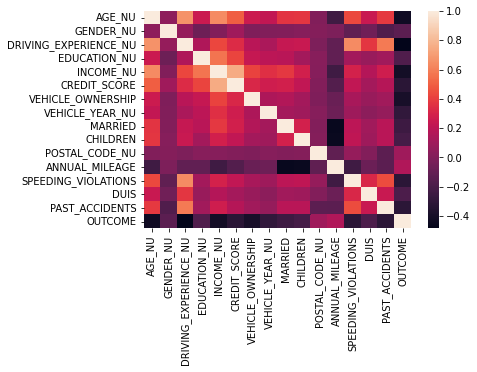

In [122]:
# Create correlation matrix to select features
correlation_matrix = data[['AGE_NU', 'GENDER_NU', 'DRIVING_EXPERIENCE_NU', 'EDUCATION_NU', 'INCOME_NU', 'CREDIT_SCORE',	'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR_NU', 'MARRIED', 'CHILDREN', 'POSTAL_CODE_NU', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS',	'DUIS',	'PAST_ACCIDENTS',	'OUTCOME']].corr()
sns.heatmap(correlation_matrix)
correlation_matrix

In [123]:
# All the features have above 0.1 correlation to outcome
# Backward Elimination is used through multiple iterations dropping 1 feature at a time
# total features ['AGE_NU', 'GENDER_NU', 'DRIVING_EXPERIENCE_NU', 'EDUCATION_NU', 'INCOME_NU', 'CREDIT_SCORE',	'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR_NU', 'SPEEDING_VIOLATIONS',	'DUIS',	'PAST_ACCIDENTS']

#X_variables = ['AGE_NU', 'GENDER_NU', 'DRIVING_EXPERIENCE_NU', 'INCOME_NU', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR_NU', 'DUIS', 'PAST_ACCIDENTS']

X_variables = ['AGE_NU', 'GENDER_NU', 'DRIVING_EXPERIENCE_NU', 'INCOME_NU', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR_NU', 'MARRIED', 'CHILDREN', 'POSTAL_CODE_NU', 'ANNUAL_MILEAGE', 'DUIS', 'PAST_ACCIDENTS']
y_variable = 'OUTCOME'

X = data[X_variables]
y = data[y_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("X_train size:", X_train.shape[0])
print("X_test size:", X_test.shape[0])

X_train size: 5224
X_test size: 2240


Logistic regression model

In [124]:
model1 = LogisticRegression()

model1.fit(X_train, y_train)

y1_pred = model1.predict(X_test)
y1_pred_prob = model1.predict_proba(X_test)[:, 1]

result1 = pd.DataFrame({'y_act':y_test, 'y1_pred':y1_pred, 'y1_pred_prob':y1_pred_prob})
result1.sample(10)

,y_act,y1_pred,y1_pred_prob
3080,1.0,0.0,0.426850
6470,0.0,0.0,0.188624
7206,1.0,1.0,0.742413
7396,0.0,0.0,0.029578
1704,0.0,0.0,0.060306
6497,0.0,0.0,0.020549
4374,0.0,0.0,0.015876
6238,0.0,1.0,0.667471
6923,0.0,0.0,0.045423
9728,0.0,0.0,0.270941


In [125]:
from sklearn.metrics import confusion_matrix
cf_matrix1 = confusion_matrix(result1['y_act'], result1['y1_pred'])

print(cf_matrix1)

[[1314  147]
 [ 366  413]]


In [126]:
acuracy_LRG = metrics.accuracy_score(result1['y_act'], result1['y1_pred']) 
acuracy_LRG

0.7709821428571428

In [127]:
precision_LRG = metrics.precision_score(result1['y_act'], result1['y1_pred'], average='binary', pos_label=1)
precision_LRG

0.7375

In [128]:
f1_score_LRG = metrics.f1_score(result1['y_act'], result1['y1_pred'], average='weighted') 
f1_score_LRG

0.7602375555495774

Decision Tree Classifier

In [129]:
model2 = DecisionTreeClassifier(random_state=0, max_depth=10, min_samples_split=2)

model2.fit(X_train, y_train)

y2_pred = model2.predict(X_test)
y2_pred_prob = model1.predict_proba(X_test)[:, 1]

result2 = pd.DataFrame({'y_act':y_test, 'y2_pred':y2_pred, 'y2_pred_prob':y2_pred_prob})
result2.sample(10)

,y_act,y2_pred,y2_pred_prob
2446,0.0,0.0,0.108170
338,0.0,0.0,0.063927
6732,1.0,0.0,0.351413
2799,1.0,1.0,0.628676
8479,1.0,0.0,0.737414
6786,0.0,0.0,0.611455
6559,0.0,0.0,0.146256
841,1.0,1.0,0.666979
6179,0.0,0.0,0.061570
2786,0.0,1.0,0.366242


In [130]:
cf_matrix2 = confusion_matrix(result2['y_act'], result2['y2_pred'])

print(cf_matrix2)

[[1298  163]
 [ 262  517]]


In [131]:
acuracy_DTC = metrics.accuracy_score(result2['y_act'], result2['y2_pred']) 
acuracy_DTC

0.8102678571428571

In [132]:
precision_DTC = metrics.precision_score(result2['y_act'], result2['y2_pred'], average='binary', pos_label=1)
precision_DTC

0.7602941176470588

In [133]:
f1_score_DTC = metrics.f1_score(result2['y_act'], result2['y2_pred'], average='weighted') 
f1_score_DTC

0.8069395674273039

RandomForest classifier

In [134]:
model3 = RandomForestClassifier(random_state=0, max_depth=10, min_samples_split=2)

model3.fit(X_train, y_train)

y3_pred = model3.predict(X_test)
y3_pred_prob = model3.predict_proba(X_test)[:, 1]

result3 = pd.DataFrame({'y_act':y_test, 'y3_pred':y3_pred, 'y3_pred_prob':y3_pred_prob})
result3.sample(10)

,y_act,y3_pred,y3_pred_prob
760,1.0,1.0,0.906728
1226,1.0,0.0,0.476080
2769,1.0,0.0,0.436693
6486,0.0,0.0,0.072078
1233,1.0,0.0,0.255190
6037,1.0,1.0,0.682979
6676,1.0,1.0,0.525490
2981,1.0,0.0,0.499320
528,1.0,1.0,0.945230
5111,0.0,1.0,0.663356


In [135]:
cf_matrix3 = confusion_matrix(result3['y_act'], result3['y3_pred'])

print(cf_matrix3)

[[1331  130]
 [ 221  558]]


In [136]:
acuracy_RFC = metrics.accuracy_score(result3['y_act'], result3['y3_pred']) 
acuracy_RFC

0.8433035714285714

In [137]:
precision_RFC = metrics.precision_score(result3['y_act'], result3['y3_pred'], average='binary', pos_label=1)
precision_RFC

0.811046511627907

In [138]:
f1_score_RFC = metrics.f1_score(result3['y_act'], result3['y3_pred'], average='weighted') 
f1_score_RFC

0.8408098339128164

Support vector machines

In [ ]:
model4 = svm.SVC(kernel='linear', C=1.0, probability=True)

model4.fit(X_train, y_train)

y4_pred = model4.predict(X_test)
y4_pred_prob = model4.predict_proba(X_test)[:, 1]

result4 = pd.DataFrame({'y_act':y_test, 'y4_pred':y4_pred, 'y4_pred_prob':y4_pred_prob})
result4.sample(10)


In [52]:
cf_matrix4 = confusion_matrix(result4['y_act'], result4['y4_pred'])

print(cf_matrix4)

[[1289  172]
 [ 199  580]]


In [53]:
acuracy_SVM = metrics.accuracy_score(result4['y_act'], result4['y4_pred']) 
acuracy_SVM

0.834375

In [54]:
precision_SVM = metrics.precision_score(result4['y_act'], result4['y4_pred'], average='binary', pos_label=1)
precision_SVM

0.7712765957446809

In [55]:
f1_score_SVM = metrics.f1_score(result4['y_act'], result4['y4_pred'], average='weighted') 
f1_score_SVM

0.8336727594116305

Model comparison

In [139]:
# Created 4 models compared to select best model
metrics_comp = [['LRG', acuracy_LRG, precision_LRG, f1_score_LRG],
['DTC', acuracy_DTC, precision_DTC, f1_score_DTC],
['RFC', acuracy_RFC, precision_RFC, f1_score_RFC]]
#['SVM', acuracy_SVM, precision_SVM, f1_score_SVM]]

pd.DataFrame(data=metrics_comp, columns=['Model', 'accuracy', 'precision', 'f1_score'])

,Model,accuracy,precision,f1_score
0,LRG,0.770982,0.737500,0.760238
1,DTC,0.810268,0.760294,0.806940
2,RFC,0.843304,0.811047,0.840810




Model calibration

In [140]:

result3['y3_pred_prob'].value_counts(bins=10)

(-0.0017820000000000002, 0.0981]    815
(0.0981, 0.196]                     296
(0.882, 0.98]                       168
(0.588, 0.686]                      163
(0.49, 0.588]                       156
(0.196, 0.294]                      152
(0.392, 0.49]                       147
(0.294, 0.392]                      129
(0.784, 0.882]                      109
(0.686, 0.784]                      105
Name: y3_pred_prob, dtype: int64

In [141]:
result3['q_bucket'] = pd.qcut(result3['y3_pred_prob'], q=10, duplicates='drop')

calib_table  = result3.groupby(by='q_bucket').agg(
    count=pd.NamedAgg(column="q_bucket", aggfunc="count"),
    response_count=pd.NamedAgg(column="y_act", aggfunc="sum"),
    min_probability = pd.NamedAgg(column="y3_pred_prob", aggfunc="min"),
    mean_probability = pd.NamedAgg(column="y3_pred_prob", aggfunc="mean"),
    ).reset_index()

calib_table['precision'] = calib_table['response_count'] / calib_table['count'] 
calib_table['response_fraction'] = calib_table['response_count'] / calib_table['response_count'].sum()
calib_table

,q_bucket,count,response_count,min_probability,mean_probability,precision,response_fraction
0,"(-0.000803, 0.00989]",224,1.0,0.000197,0.004885,0.004464,0.001284
1,"(0.00989, 0.0316]",224,2.0,0.009903,0.019660,0.008929,0.002567
2,"(0.0316, 0.0669]",224,5.0,0.031670,0.049016,0.022321,0.006418
3,"(0.0669, 0.118]",224,13.0,0.066905,0.090663,0.058036,0.016688
4,"(0.118, 0.199]",224,33.0,0.117688,0.154398,0.147321,0.042362
5,"(0.199, 0.357]",224,71.0,0.199464,0.272742,0.316964,0.091142
6,"(0.357, 0.508]",224,110.0,0.357161,0.433657,0.491071,0.141207
7,"(0.508, 0.648]",224,162.0,0.508377,0.578154,0.723214,0.207959
8,"(0.648, 0.838]",224,173.0,0.648124,0.730924,0.772321,0.222080
9,"(0.838, 0.98]",224,209.0,0.839247,0.914349,0.933036,0.268293


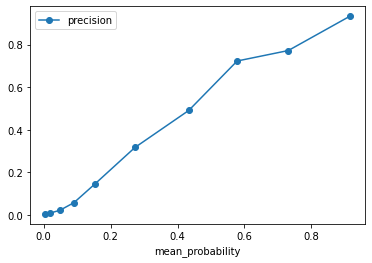

In [142]:
calib_table.plot(x='mean_probability', y='precision', marker='o')

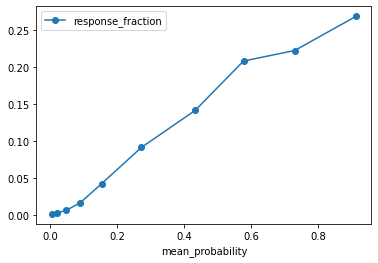

In [143]:
calib_table.plot(x='mean_probability', y='response_fraction', marker='o')

Hyper parameter tunning

In [144]:
from sklearn.model_selection import RandomizedSearchCV
# Define Hyperparameter Grid
param_grid = {"max_depth": [3, 10, 100],
              "min_samples_leaf": [5, 10, 50, 100, 200],
              "min_samples_split": [5, 10, 20, 100]
             }
  
  
# Create RandomizedSearchCV object
model_cv = RandomizedSearchCV(model3, param_grid, cv=5, scoring='f1')
  
model_cv.fit(X_train[X_variables], y_train)
  
# Print the tuned parameters and score
print("Tuned Model Parameters: {}".format(model_cv.best_params_))
print("Best model score: {}".format(model_cv.best_score_))

Tuned Model Parameters: {'min_samples_split': 20, 'min_samples_leaf': 10, 'max_depth': 100}
Best model score: 0.721115595753498


In [145]:
model3_opti = RandomForestClassifier(random_state=0, max_depth=100, min_samples_split=20, min_samples_leaf=10)

model3_opti.fit(X_train, y_train)

y3_opti_pred = model3_opti.predict(X_test)
y3_opti_pred_prob = model3_opti.predict_proba(X_test)[:, 1]

result3_opti = pd.DataFrame({'y_act':y_test, 'y3_pred':y3_opti_pred, 'y3_pred_prob':y3_opti_pred_prob})
result3_opti.sample(10)

,y_act,y3_pred,y3_pred_prob
8284,0.0,0.0,0.032621
8712,1.0,1.0,0.685381
5111,0.0,1.0,0.669417
7929,0.0,0.0,0.278315
2587,0.0,0.0,0.020002
5538,0.0,0.0,0.158255
1794,0.0,0.0,0.066332
2183,1.0,1.0,0.928705
731,0.0,0.0,0.052772
4067,0.0,0.0,0.455703


In [146]:
cf_matrix3_opti = confusion_matrix(result3_opti['y_act'], result3_opti['y3_pred'])

print(cf_matrix3_opti)

[[1329  132]
 [ 246  533]]


In [147]:
acuracy_RFC_opti = metrics.accuracy_score(result3_opti['y_act'], result3_opti['y3_pred']) 
acuracy_RFC

0.8433035714285714

In [148]:
precision_RFC_opti = metrics.precision_score(result3_opti['y_act'], result3_opti['y3_pred'], average='binary', pos_label=1)
precision_RFC_opti

0.8015037593984963

In [149]:
f1_score_RFC_opti = metrics.f1_score(result3_opti['y_act'], result3_opti['y3_pred'], average='weighted') 
f1_score_RFC_opti

0.8277570470147702

Feature Importance

In [150]:
#importance=model1.coef_
#importance_t = importance.reshape(9,)
#importance_t
feature_importances = model3.feature_importances_
feature_importances

array([0.10800772, 0.03531921, 0.1955605 , 0.06192764, 0.13071555,
       0.1314777 , 0.07144979, 0.01846614, 0.01987418, 0.07152777,
       0.07263404, 0.01241008, 0.07062967])

In [151]:
features = X_test.columns
features

Index(['AGE_NU', 'GENDER_NU', 'DRIVING_EXPERIENCE_NU', 'INCOME_NU',
       'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR_NU', 'MARRIED',
       'CHILDREN', 'POSTAL_CODE_NU', 'ANNUAL_MILEAGE', 'DUIS',
       'PAST_ACCIDENTS'],
      dtype='object')

In [152]:
feature_importance_table = pd.DataFrame(data={'features': features, 'feature_importances':feature_importances})
feature_importance_table.sort_values(by='feature_importances', ascending=False)


,features,feature_importances
2,DRIVING_EXPERIENCE_NU,0.195561
5,VEHICLE_OWNERSHIP,0.131478
4,CREDIT_SCORE,0.130716
0,AGE_NU,0.108008
10,ANNUAL_MILEAGE,0.072634
9,POSTAL_CODE_NU,0.071528
6,VEHICLE_YEAR_NU,0.071450
12,PAST_ACCIDENTS,0.070630
3,INCOME_NU,0.061928
1,GENDER_NU,0.035319


Saving the model

In [153]:
import joblib

save_file = 'Vehicle_Insure_model3_RFC.joblib'
joblib.dump(model3, open(save_file, 'wb'))